# DS 325 - Linear regression

In this notebook, we will perform some basic data analysis.  Your homework assignment will be to perform the same steps with different datasets adding your work into this Jupyter notebook in the designated areas and answering questions about your work in a corresponding Moodle quiz.  


First, we import necessary libraries into our Python environment.  You will not need to re-import these for your exercises below (its already loaded into the kernel).  
* **numpy** is a scientific computing library which includes fast, efficient, multidimensional arrays (i.e. tables) for our data
* **pandas** builds on numpy to give us efficient data structures (e.g. dataframes) and data analysis tools which are fundamental to data science <!-- * **pandas_profiling** adds tools for analyzing and helping us better understand our data.-->
* **matplotlib** is a 2D plotting library for scientific visualization
* **statsmodel** provides a variety of regression, classification, and machine learning algorithms for building models of our data, many alternative **sklearn**, **scipy**, ...

These imports need only occur once before their use, and should not be copied and repeated below.  To start the notebook fresh and rerun the cells of your notebook, "Restart and run all..." (using the button or Kernel menu item).

# Data: Advertising

The advertising dataset contains the following data
* 200 samples of the budget for advertising for **TV**,	**Radio**,	and **Newspaper**
* Dependent variable is **Sales**
* Sales are in thousands of units and the budget is in thousands of dollars.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
import statsmodels.api as sm

Our first step is to read data from a [comma-separated values (CSV) file](https://en.wikipedia.org/wiki/Comma-separated_values) named "`data.csv`".  We will load the CSV data into a `pandas` dataframe "`df`" like this:

For each exercise, I will provide two methods to import the data.  One uses a url (download the data and store in RAM), or you may download the dataset and import from the working directory.  I'll usually do the later as I can work on a project offline.  Please uncomment the method you want to use and comment the other.

In [2]:
# Load Advertising dataset
#web_path = '' #if downloaded data to the current folder
web_path = 'http://public.gettysburg.edu/~jpuckett/ds325/data/' #if using data over web
df = pd.read_csv(web_path+'advertising.csv')
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


.describe() generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


.info() prints a concise summary of a DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


plot correlations and distribution for our dataset

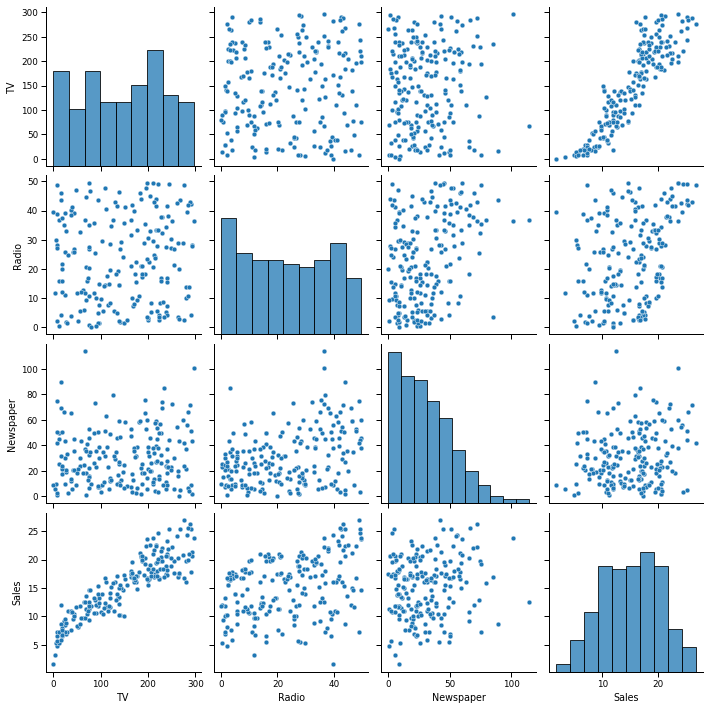

In [5]:
sns.pairplot(df);

Lets quantify the correlations between variables.

<AxesSubplot:>

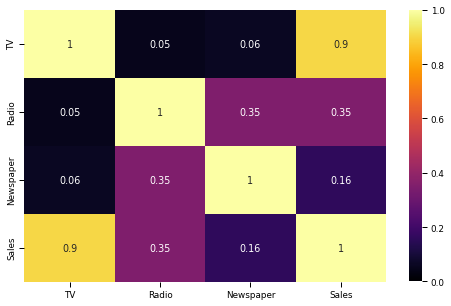

In [6]:
correlation_matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(8.1, 5))
sns.heatmap(data=correlation_matrix, annot=True, cmap='inferno',vmin=0)# annot = True to print the values inside the square

We see that TV and Sales have the highest correlation.  However we also see that Radio and Newspaper have a correlations of 0.35 -- we'll come back to that on your Exercise.

Onto some simple analysis

# Linear regression intro
Lets focus on the Sales (in thousands) as a function of the TV advertising budget (in thousands).  From the above plots, this is a reasonably linear relationship that doesn't seem to depend much on the species.

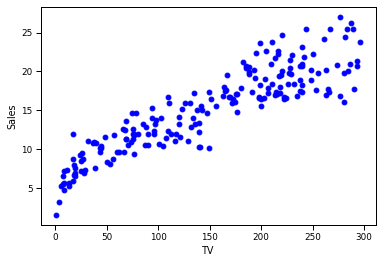

In [7]:
# Variables
x = np.array(df['TV']) #convert into a numpy array 
y = np.array(df['Sales'])
#
plt.plot(x,y,'bo')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

## Least square regression
So background, with a **little** matrix algebra

$\boldsymbol{y} = \theta_0 + \theta_1 \boldsymbol{x} $
* y is the predicted value
* $x$ is the feature. 
* $\theta_j$ is the $j^{th}$ model parameter
Here $\theta$ is the vector of unknown parameters

$\boldsymbol{y} = \left( \begin{align}y_1\\ y_2 \\ \vdots \\ y_n \end{align} \right)$

Similarly, we group both the coefficients into a single vector (i.e., a 2 × 1 matrix)

$\theta = \left( \begin{align}\theta_1\\ \theta_2 \end{align} \right)$

We’d also like to group the observations of the predictor variable together,
but we need something which looks a little unusual at first:

$\boldsymbol{x} = \left( \begin{align}1, x_1\\ 1, x_2 \\ \vdots \quad \\ 1, x_n \end{align} \right)$

This is an n×2 matrix, where the first column is always 1, and the second column
contains the actual observations of x. We have this apparently redundant first
column because of what it does for us when we multiply x by $\theta$:

$x \theta = \left( \begin{align}\theta_0 + \theta_1 x_1\\ \theta_0 + \theta_1 x_2 \\ \vdots\qquad \\ \theta_0 + \theta_1 x_n \end{align} \right)$


### Finding the model parameters
The model is simple, but how do we find those parameters?  First we must decide on the regression model.  The most common is the Root Mean Square Error (RMSE).  Our model will fit (or train) the model to find the $\theta_j$ which minimizes the RMSE. Below is the 'cost function' which we are trying to minimize.


### Mean Squared Error

At each data point, using the coefficients β results in some error of prediction,
so we have n prediction errors. These form a vector:

$\boldsymbol{e} = \boldsymbol{y} - \boldsymbol{x}\theta$

Here $\boldsymbol{e}$ is the error, also known as the **residuals**.

The mean squared error is then

$MSE = \frac{1}{N} \sum_{i=1}^N e_i^2$

or

$MSE = \frac{1}{N} e^T e$

* $\boldsymbol{e}^T$ is the transpose of $\boldsymbol{e}$

in terms of $\boldsymbol{x}$ and $\boldsymbol{y}$ we have,

$MSE = \frac{1}{N} (\boldsymbol{y}^T \boldsymbol{y} - 2 \theta^T \boldsymbol{x}^T \boldsymbol{y} + \theta^T \boldsymbol{x}^T \boldsymbol{x} \theta  )$

### The normal equation
To find the $\theta$ which minimizes our cost function, MSE, there is an analytical solution.

$\boldsymbol{\theta} = ( \boldsymbol{x}^T \boldsymbol{x} )^{-1} \boldsymbol{x}^T y$

* $\boldsymbol{\theta}$ is the value which minimizes the MSE
* $^{-1}$ is the inverse of the matrix
* $^T$ is the transpose 

That is, we’ve got one matrix equation which gives us both coefficient estimates.

Now, from the above, we can find $\theta_0$ and $\theta_1$,

$\theta_1 = \dfrac{\sum xy - \bar{x} \bar{y} }{\bar{x^2}-\bar{x}^2} = \dfrac{Cov(x,y)}{Var(x)}$

$\theta_0 = \bar{y} - \theta_1 \bar{x}$

* the denominator of $\theta_1$ is the variance of x (where variance is the square of the standard deviation)
* the numerator is the covariance of the product of x and y


Let's try this on our dataset.

In [8]:
# Calculate the mean of X and y
def get_slope(x, y):  
    numerator = np.mean(x)*np.mean(y) - np.dot(x,y)/x.shape
    denominator =  np.mean(x)**2 - np.mean(x**2)
    return numerator / denominator
def get_intercept(x, y):
    return np.mean(y) - get_slope(x, y)*np.mean(x)
# Calculate slope and intercept
slope = get_slope(x,y)
intercept = get_intercept(x,y)
print('intercept = %5f'%intercept)
print('slope     = %5f'%slope)

intercept = 6.974821
slope     = 0.055465


From the **normal equation** above, we can also use our matrix algebra to do this.

In [9]:
X_b = np.c_[np.ones(x.shape),x] #add a column of ones to our x
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #
print('intercept = %5f'%theta_best[0])
print('slope     = %5f'%theta_best[1])

intercept = 6.974821
slope     = 0.055465


### a few alternative to simple regression
* **numpy.polyfit(x,y,deg)**  return coefficients that minimizes the MSE, **scipy.polyfit()** is the same algo
* **numpy.linalg.lstsq(a,b)**, simple or multi-variate regression; need to append a column of 1’s to the x data for intercept (A = [1 x])
* **Stats.linregress()** - cannot do multivariate data, return R2, standard error
* **sklearn.linear_model.LinearRegression()** use .fit(X,y)
* **Statsmodels.OLS(y,x)** - extensive list of result statistics,  need to append a column of 1’s to the x data for intercept
* **scipy.optimize.curve_fit(f,x,y)** - can fit any user-defined function to a data set by doing least-square minimization.

In [10]:
weights = np.polyfit(x, y, 1)
model = np.poly1d(weights)
print(model)

 
0.05546 x + 6.975


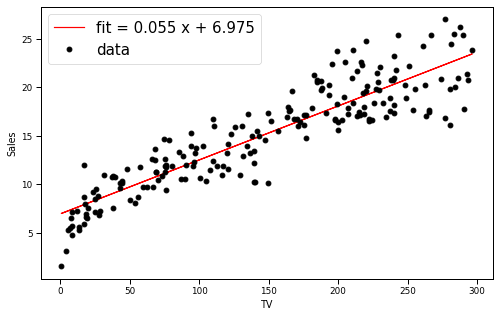

In [11]:
ypred = slope*x+intercept
# Plot regression against actual data
plt.figure(figsize=(8.1, 5))
lbl="fit = %3.3f x + %3.3f"%(slope,intercept)
plt.plot(x, ypred,'r-',label=lbl)        # regression line
plt.plot(x, y, 'ko',label='data')           # scatter plot showing actual data
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(fontsize=15)
plt.show()

## Linear regression with StatsModels


In [12]:
lm = sm.OLS.from_formula('Sales ~ TV', data=df) #y~x
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           7.93e-74
Time:                        16:26:24   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.0

### Interpreting the Regression Results
* **Adjusted. R-squared** reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
* **Intercept** is your Y-intercept. It means that if the X value is zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
* **TV coef** represents the change in the output Y due to a change of one unit in the X (everything else held constant)
* **std err** reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
* **P >|t|** is your p-value. A p-value of less than 0.05 is considered to be statistically significant
* **Confidence Interval []** represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

Want individual attributes? You can access and print them independently like this:

In [13]:
print("Slope      = %f"%result.params[1])
print("Intercept  = %f"%result.params[0])
print("R^2        = %f"%result.rsquared)
print("Fvalue     = %f"%result.fvalue)
print("Pvalue     = %g"%result.pvalues[1]) 

Slope      = 0.055465
Intercept  = 6.974821
R^2        = 0.812176
Fvalue     = 856.176713
Pvalue     = 7.92791e-74


## Reporting your results, or more than you wanted to know about p-values

A p-value ≤ 0.05 is an arbitrary but commonly used criterion for determining whether an observed difference is "statistically significant" or not. While it does not take into account the possible effects of bias or confounding, a p-value of ≤ 0.05 suggests that there is a 5% probability or less that the observed differences were the result of sampling error (chance). While it does not indicate certainty, it suggests that the null hypothesis is probably not true, so we reject the null hypothesis and accept the alternative hypothesis if the p-value is less than or equal to 0.05. 

The 0.05 criterion indicates the probability of incorrectly rejecting the null hypothesis.

A p-value > 0.05 would be interpreted by many as "not statistically significant," meaning that there was not sufficiently strong evidence to reject the null hypothesis. Here we **fail to reject the null** rather than "accept the null" as there is insufficient evidence that they are different.


There is an unfortunate tendency for p-values to devolve into a conclusion of "significant" or "not significant" based on the p-value.

1. P-values do not imply causation.
2. P-values do not indicate whether the null or alternative hypothesis is really true.
3. P-values do not indicate the strength or direction of an effect, i.e., the "magnitude of effect."
4. Statistical significance does not take into account the evaluation of bias and confounding. Also consider the sample size.


## what to report?

Many researchers and practitioners now prefer **confidence intervals**, because they focus on the estimated effect size and how precise the estimate is rather than "Is there an effect?"

Also note that the meaning of "significant" depends on the audience. To scientists it mean "statistically significant," i.e., that p ≤ 0.05, but to a lay audience significant means "important."


* **Measure of effect**: the magnitude of the difference between the groups, e.g., difference in means, risk ratio, risk difference, odds ratio, etc.
* **P-value**: The probability of observing differences this great or greater if the null hypothesis is true.
* **Confidence interval**: a measure of the precision of the measure of effect. The confidence interval estimates the range of values compatible with the evidence.

Now let's try making some predictions using this model. 
 
* TV = 100

In [14]:
prediction =result.get_prediction(exog=dict(TV=[100]))  #make a prediciton
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12.521299,0.185213,12.156056,12.886541,7.979338,17.063259


### Digging a little deeper, examining the residulas
We can also plot the residuals against the fitted values.
One thing we look for here is that the residuals are uniformly scattered with no (or little) x-dependence.  

<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

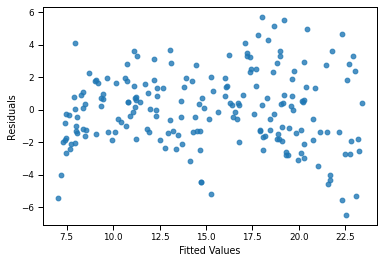

In [15]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(x=fitted_values, y=residuals, fit_reg=False)

We can also look for points with high leverage, that is, which data points may be outliers.

A data point is influential if it unduly influences any part of a regression analysis, such as the predicted responses, the estimated slope coefficients, or the hypothesis test results. Outliers and high leverage data points have the potential to be influential, but we generally have to investigate further to determine whether or not they are actually influential.

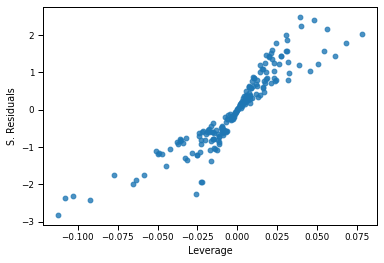

In [16]:
from statsmodels.stats.outliers_influence import OLSInfluence
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals") #normalized residuals
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(x=leverage, y=s_residuals,  fit_reg=False);

## Interpreting our results

We see that Newspaper advertising has a small coefficient (0.0383) with a relatively large std err (0.017).  The resulting p_value for the slope is 0.025, which is less than 0.05.  However, the confidence interval for the slope is quite large.  


## Multivariate Linear Regression

In [17]:
lm = sm.OLS.from_formula('Sales ~ Radio+Newspaper', data = df)
result = lm.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.89
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           2.28e-06
Time:                        16:26:25   Log-Likelihood:                -603.03
No. Observations:                 200   AIC:                             1212.
Df Residuals:                     197   BIC:                             1222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0607      0.728     16.556      0.0

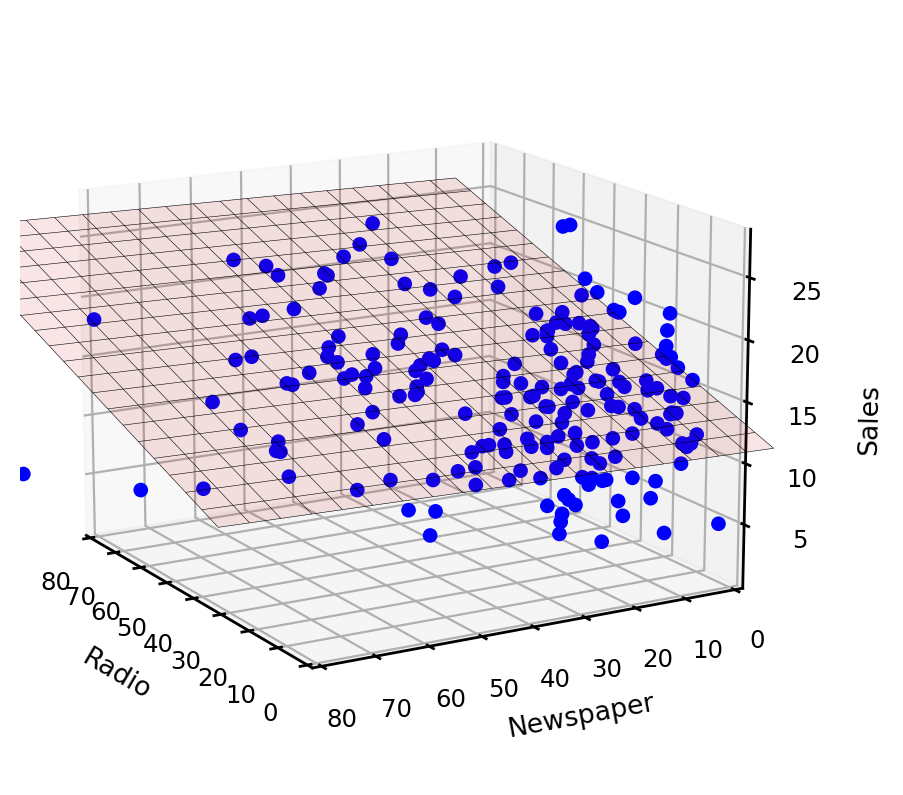

In [18]:
x_surf = np.linspace(-5, 100, 20)                # generate a mesh
y_surf = np.linspace(-5, 100, 20)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
#
exog = pd.core.frame.DataFrame({'Radio': x_surf.ravel(), 'Newspaper': y_surf.ravel()})
Z = np.array(result.predict(exog = exog)).reshape(x_surf.shape)
#
fig = plt.figure(figsize=(8.1, 5),dpi= 200)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Radio'], df['Newspaper'], df['Sales'],c='blue',marker='o',alpha=1)
ax.plot_surface(x_surf, y_surf, Z,color='r', alpha=0.1, cstride=1, rstride=1, linewidth=0.1, antialiased=True)
ax.plot_wireframe(x_surf,y_surf,Z, color='k',linewidth=0.2)
ax.set_xlabel('Radio')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Sales')
ax.set_xlim([0,80])
ax.set_ylim([0,80])
ax.view_init(15, 150)